# Visualization of machine learning performance with AUC
##### Samo Turk, Team SKI, BioMed X Innovation center
This notebook should be run locally because it includes interactive widgets which might not be rendered properly by GitHub.
Some functionality might need https://github.com/ipython-contrib/jupyter_contrib_nbextensions/ (optional)

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score, accuracy_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.cross_validation import train_test_split
from ipywidgets import interact, fixed

In [3]:
plt.style.use('bmh')

In [4]:
def make_data(positives, negatives, dist, random_state=5):
    """
    Generates 2 blobs of data seperated by dist.
    """
    X_p,y = make_blobs(n_samples=positives, centers=np.array([[0,1]]), random_state=random_state)
    X_n,y = make_blobs(n_samples=negatives, centers=np.array([[0+dist,1-dist]]), random_state=random_state)
    print(X_p.shape)
    y_p = np.ones(len(X_p), np.int)
    y_n = np.zeros(len(X_n), np.int)
    X = np.vstack((X_p, X_n))
    y = np.hstack((y_p, y_n))
    data = list(zip(X,y))
    np.random.shuffle(data)
    xs = []
    ys = []
    for x,y in data:
        xs.append(x)
        ys.append(y)
    X = np.vstack(xs)
    y = np.array(ys)
    return X, y

def plot_blobs(X,y):
    fig = plt.figure(figsize=(3,2), dpi=80)
    axes = fig.add_axes([0, 0, 1, 1])
    axes.scatter(X[y==0].T[0], X[y==0].T[1], color='r', marker='o', edgecolors='w', alpha=0.5)
    axes.scatter(X[y==1].T[0], X[y==1].T[1], color='b', marker='o', edgecolors='w', alpha=0.5)
    axes.set_xlabel('feature 1')
    axes.set_ylabel('feature 2')
    return fig

## Generating data
2 blobs of points seperated by certain distance

(100, 2)


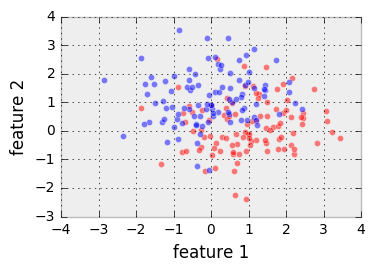

In [5]:
plot_blobs(*make_data(100, 100, 1));

## Train the model and test it on test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(*make_data(1000, 1000, 1))
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

(1000, 2)


In [7]:
def plot_hist(y, scores, title, size=(1.5,1.5)):
    fig = plt.figure(figsize=size, dpi=80)
    axes = fig.add_axes([0, 0, 1, 1])
    bins = np.linspace(0, 1, 11)
    axes.hist([x[0] for x in zip(scores, y) if x[1] == 1], bins, alpha=0.5, color= 'b')
    axes.hist([x[0] for x in zip(scores, y) if x[1] == 0], bins, alpha=0.5, color= 'r')
    axes.vlines(0.5, 0, np.histogram(scores, bins)[0].max(), color='black', linestyles='--')
    axes.set_ylim((0, np.histogram(scores, bins)[0].max()))
    axes.set_xlabel(title)
    axes.set_ylabel('#')
    return fig

def plot_ROC(observations, probabilities, title="", labels=True, size='auto'):
    """
    Creates ROC plot from observations (y_test) and probabilities (y_pred_proba)
    title -- title of the plot
    size -- tuple, size in inch, defaults to 'auto'
    labels -- toogle display of title and x and y labels and tick labels
    """
    if size is 'auto':
        fig = plt.figure()
    else:
        fig = plt.figure(num=None, figsize=size, dpi=80)
    axes = fig.add_axes([0, 0, 1, 1])
    fpr, tpr, thresholds = roc_curve(observations, probabilities)
    #roc_auc = auc(fpr, tpr)
    #print "Area under the ROC curve : %f" % roc_auc
    axes.plot(fpr, tpr)
    axes.plot([0, 1], [0, 1], 'k--')
    axes.set_aspect('equal')
    if labels:
        axes.set_title(title)
        axes.set_xlabel('False Positive Rate')
        axes.set_ylabel('True Positive Rate')
    else:
        axes.get_xaxis().set_ticks([])
        axes.get_yaxis().set_ticks([])
    return fig

Plot score distribution

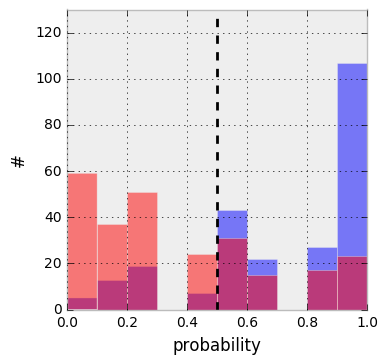

In [8]:
plot_hist(y_test, y_pred_proba.T[1], 'probability', size=(3,3));

Plot ROC curve

AUC: 0.798


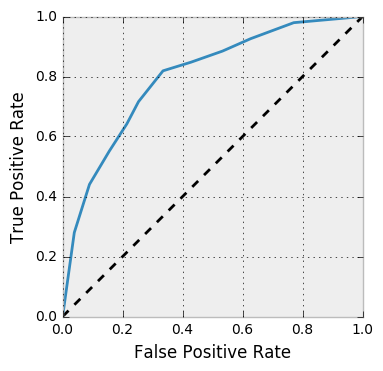

In [9]:
print("AUC: %.3f" % roc_auc_score(y_test, y_pred_proba.T[1]))
plot_ROC(y_test, y_pred_proba.T[1], size=(3,3));

In [10]:
def classifier_eval(positives=1000, negatives=1000, seperation=1, random_state=5, classifier=GradientBoostingClassifier):
    X,y = make_data(positives, negatives, seperation, random_state=random_state,)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf = classifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)
    recall1 = recall_score(y_test, y_pred, pos_label=1)
    recall0 = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_pred_proba.T[1])
    accuracy = accuracy_score(y_test, y_pred)
    print("AUC: %.3f\nRecall 1: %.2f\nRecall 0: %.2f\nAccuracy: %.2f" % (auc,recall1,recall0,accuracy))
    plot_blobs(X,y);
    plot_hist(y_test, y_pred_proba.T[1], 'probability', size=(1.5,1.5));
    plot_ROC(y_test, y_pred_proba.T[1], size=(1.5,1.5));


### Classifier performance evaluaion on different sets
Data is generated on the fly, each time a new widget value is selected
* positives -- number of samples in positive class
* negatives -- number of samples in negative class
* separation -- distance between blob centres
* classifier -- any classifier that calculates probabilities
##### Classifiers that calculate pobabilites:  
* RandomForestClassifier
* AdaBoostClassifier
* ExtraTreesClassifier
* GradientBoostingClassifier

(1000, 2)
AUC: 0.842
Recall 1: 0.75
Recall 0: 0.76
Accuracy: 0.75


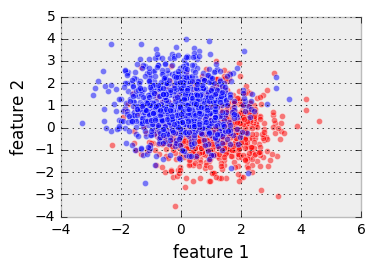

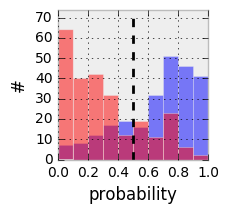

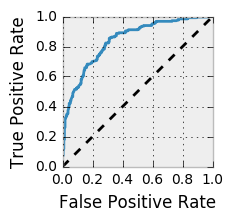

In [11]:
interact(classifier_eval, positives=[10,10000], negatives=[10,10000], 
         seperation=[0, 10, 0.1], random_state=[1,10], 
         classifier={'RandomForestClassifier':RandomForestClassifier, 'AdaBoostClassifier':AdaBoostClassifier, 
                     'GradientBoostingClassifier':GradientBoostingClassifier, 'ExtraTreesClassifier':ExtraTreesClassifier, });

More about in [IPython widgets](https://ipywidgets.readthedocs.io/en/latest/)



Copyright (C) 2016 by Samo Turk, BioMed X GmbH

This work is licensed under the Attribution 4.0 International (CC BY 4.0). To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
